# Approximation and interpolation

Approximation (from the Latin "approximatus" - "approximately") is the search for a function that is as close as possible to the available data set.

Approximation is required:

* when determining the parameters of a known function, the data on which are determined with an error (then the coefficients of the known function are sought)

* when identifying a functional dependence when it is unknown (then the function that gives the minimum discrepancy with the data is sought)

Examples of functional dependences: linear, power, exponential, trigonometric, logarithmic, hyperbolic.

The results of the approximation are assessed by the overall deviation of the model from the experimental data.

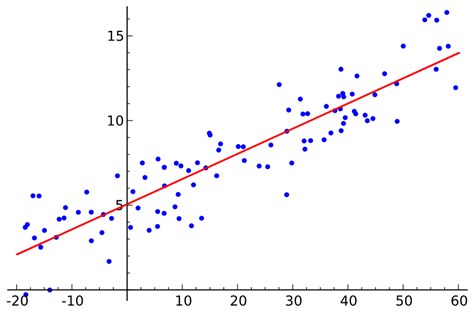

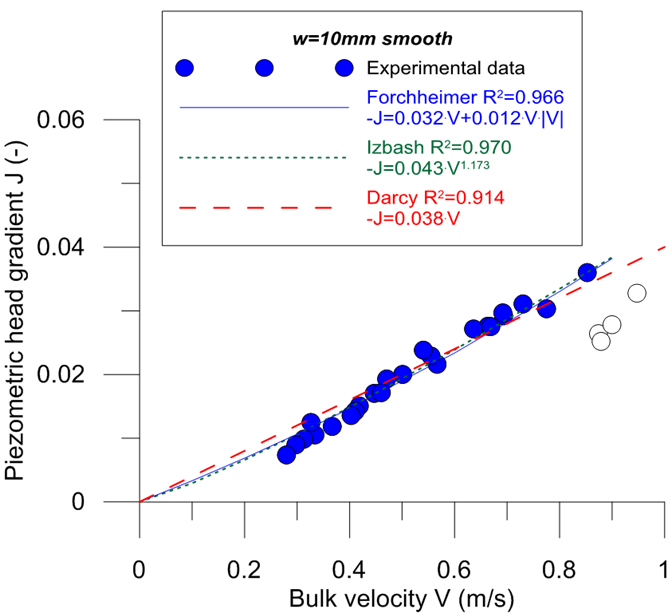

[ Experimental investigation of flow behavior in smooth and rough artificial fractures
2015, Journal of Hydrology 521(8):108-118
DOI:10.1016/j.jhydrol.2014.11.054 ]


### Approximation with NumPy


The polyfit function is used to approximate a set of values ​​with a polynomial. It returns an array of the polynomial coefficients.

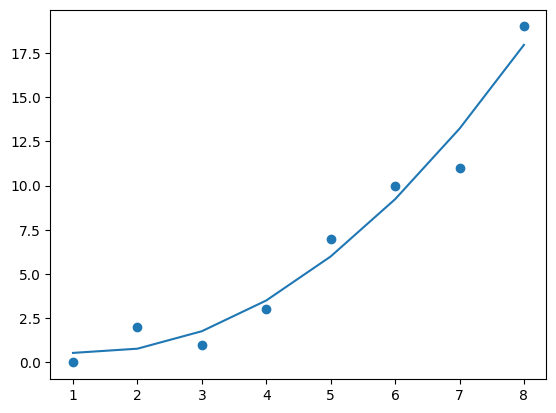

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0, 2, 1, 3, 7, 10, 11, 19] 
plt.scatter(x, y)

param = np.polyfit(x, y, 2) # returns an array of coefficients of a polynomial of degree 2
plt.plot(x, np.polyval(param, x))

plt.show()

The polyval function evaluate a polynomial at specific values.  
For example, the polynomial $x^3 − 2x^2 + 2$ for x=4 is:

In [2]:
np.polyval([1, -2, 0, 2], 4)



34

[np.float64(9.739023521247059e-33), np.float64(0.9267734553775744), np.float64(1.0)]


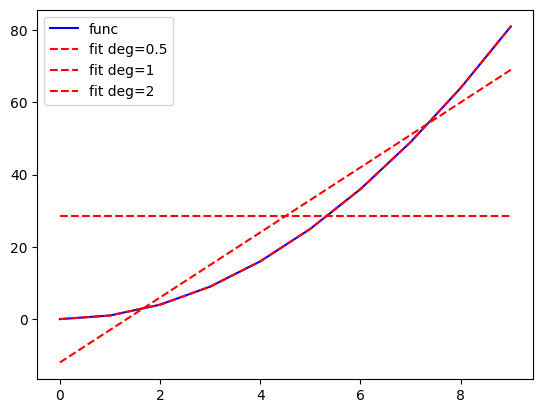

In [18]:
import matplotlib.pyplot as plt
import math

def get_r2_python(x_list, y_list):
    n = len(x_list)
    x_bar = sum(x_list)/n
    y_bar = sum(y_list)/n
    x_std = math.sqrt(sum([(xi-x_bar)**2 for xi in x_list])/(n-1))
    y_std = math.sqrt(sum([(yi-y_bar)**2 for yi in y_list])/(n-1))
    zx = [(xi-x_bar)/x_std for xi in x_list]
    zy = [(yi-y_bar)/y_std for yi in y_list]
    r = sum(zxi*zyi for zxi, zyi in zip(zx, zy))/(n-1)
    return r**2
    
x = np.arange(0,10) 
y = x**2 
degs = [1/2, 1, 2]
plt.plot(x,y, color='blue', label = 'func') 
r2_lst = []
for i in degs:
    poly = np.polyfit(x,y, deg=i) 
    plt.plot(x, np.polyval(poly, x), color='red', label = f'fit deg={i}', linestyle='dashed')
    r2 = get_r2_python(y, np.polyval(poly, x))
    r2_lst.append(r2)
plt.legend() 
print(r2_lst)
plt.show()

Approximation is performed even for a random set of data, so the responsibility for evaluating the results lies with the researcher.

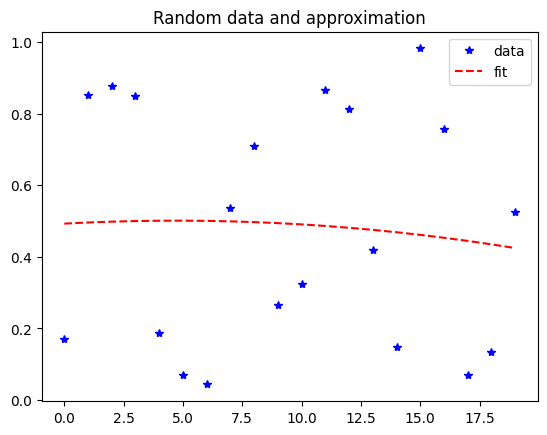

In [16]:
x = np.arange(0,20) 
y = np.random.rand(20) 
poly = np.polyfit(x,y, deg=2) 
plt.plot(x,y, 'b*', label = 'data') 
plt.plot(x, np.polyval(poly, x), color='red', label='fit', linestyle='dashed') 
plt.title("Random data and approximation")
plt.legend() 
plt.show()

"Approximation God level"

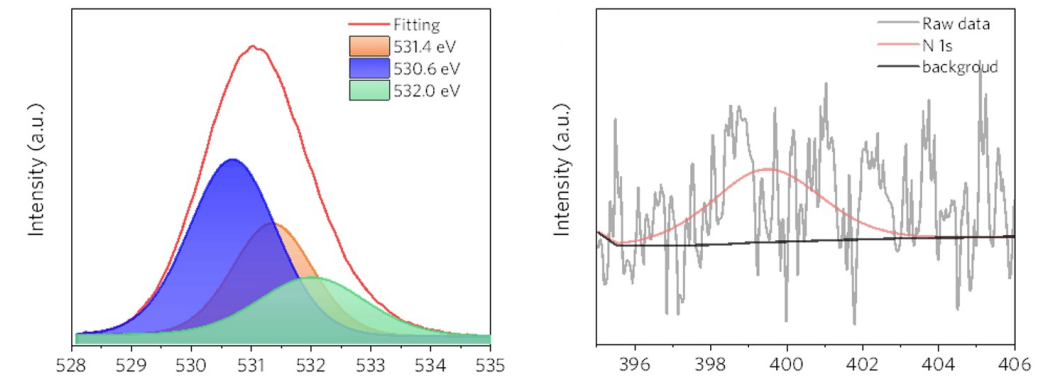

To estimate the accuracy of the approximation, the coefficient of determination R$^2$ is used.

https://en.wikipedia.org/wiki/Coefficient_of_determination

If R$^2$ = 1, this means that the influence of the random component is completely absent and the dependence of the variable y on x is exact. If R$^2$ = 0, then there is no linear dependence between these variables.

When selecting an approximating function, the function is usually chosen so that the value of the coefficient of determination is maximal.

### Problem

Write a function to estimate R2 for experimental data and the corresponding fitting function. The data is taken as one-dimensional NumPy arrays.

Or rewrite this function using NumPy functions:
```python
def get_r2_python(x_list, y_list):
    n = len(x_list)
    x_bar = sum(x_list)/n
    y_bar = sum(y_list)/n
    x_std = math.sqrt(sum([(xi-x_bar)**2 for xi in x_list])/(n-1))
    y_std = math.sqrt(sum([(yi-y_bar)**2 for yi in y_list])/(n-1))
    zx = [(xi-x_bar)/x_std for xi in x_list]
    zy = [(yi-y_bar)/y_std for yi in y_list]
    r = sum(zxi*zyi for zxi, zyi in zip(zx, zy))/(n-1)
    return r**2
```
https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy

Using the function above, compare the accuracy of approximating the parabolic relationship above using linear, parabolic, and cubic functions.

### Exponential function approximation (exponential decay)

$y=Ne^{−t/τ}$

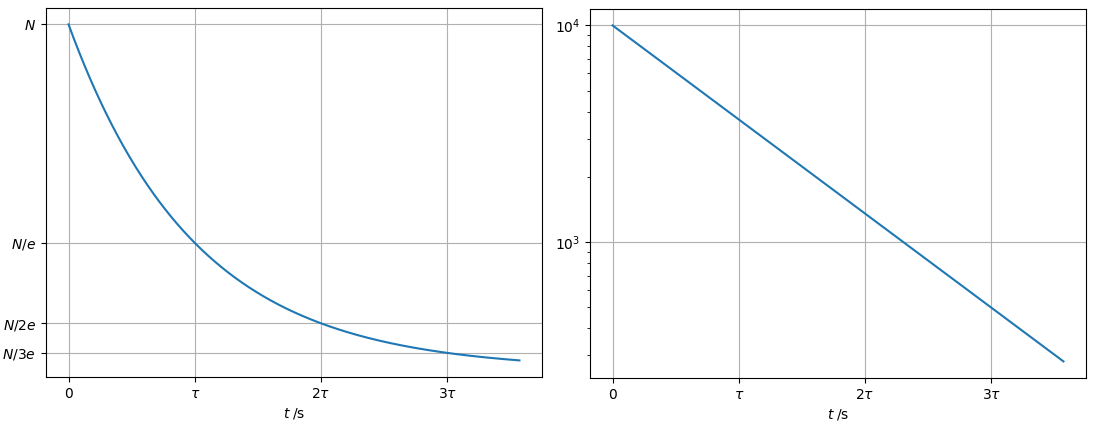

https://scipython.com/book/chapter-7-matplotlib/examples/lifetimes-of-an-exponential-decay/ 


Two ways:

Linearize the system and find a solution with numpy.polyfit for logarithmic data.

    (+) Fast and reliable
    (−) Need to know the vertical offset, or add an iterative algorithm.
    (±) Possibly need to take into account weighting factors

Use a ready-made nonlinear method (scipy.optimize.curve_fit )

    (+) no need to know the offset
    (−) slower, solution method is not guaranteed:


https://stackoverflow.com/questions/3938042/fitting-exponential-decay-with-no-initial-guessing 


$\ln e^r = r$

$\ln ae^{bx} = a + bx$ 

https://www.adamsmith.haus/python/answers/how-to-do-exponential-and-logarithmic-curve-fitting-in-python 

fitted parameters are [-0.02190002  3.51918842]


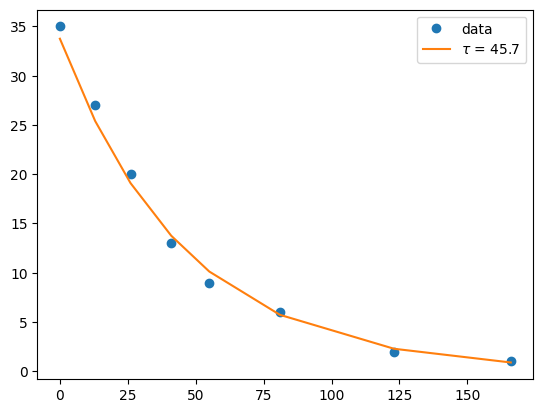

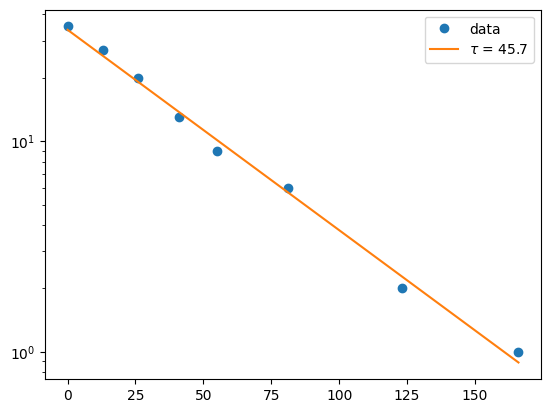

In [5]:
x_data = np.array([0,13,26,41,55,81,123,166]) # наносекунды 
y_data = np.array([35,27,20,13,9,6,2,1]) 
fit = np.polyfit(x_data, np.log(y_data), 1) 
print(f'fitted parameters are {fit}') # [-0.0219 3.519] 
y = np.exp(fit[1]) * np.exp(fit[0]*x_data) 
decay_t = np.abs(1/fit[0])
 
plt.plot(x_data, y_data, "o", label = 'data') 
plt.plot(x_data, y, label = rf'$\tau$ = {decay_t:.1f}') 
plt.legend() 
plt.show() 

plt.plot(x_data, y_data, "o", label = 'data') 
plt.plot(x_data, y, label = rf'$\tau$ = {decay_t:.1f}') 
plt.yscale('log')
plt.legend() 
plt.show() 

Analysis function without knowing the bias

https://gist.github.com/friendtogeoff/00b89fa8d9acc1b2bdf3bdb675178a29 
```python
# result is in form y = a + b * exp(c*x). 
def exp_est(x,y):
	 return [a.flat[0],b.flat[0],c.flat[0]]
```

If the start is not from zero, but from x0, replace with the value x−x0.


Or you need to use an additional library, such as scipy.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def exp(x, k):
    return np.exp(k * x)

def exp2(x, a, k):
    return a*np.exp(k * x)

x = np.array([0.035, 0.073, 0.117, 0.157, 0.205, 0.246, 0.280, 0.330, 0.376, 0.423, 0.469,
              0.504, 0.531, 0.596, 0.646, 0.676, 0.719, 0.762, 0.805, 0.869])

y = np.array([1.0, 0.918, 0.758, 0.662, 0.556, 0.457, 0.398, 0.330, 0.251, 0.215, 0.194,
              0.127, 0.127, 0.101, 0.072, 0.0418, 0.041, 0.0418, 0.041, 0.041])

k_exp = curve_fit(exp, x, y)[0]

ModuleNotFoundError: No module named 'scipy'

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

def exp(x, k):
    return np.exp(k * x)

def exp2(x, a, k):
    return a*np.exp(k * x)

x = np.array([0.035, 0.073, 0.117, 0.157, 0.205, 0.246, 0.280, 0.330, 0.376, 0.423, 0.469,
              0.504, 0.531, 0.596, 0.646, 0.676, 0.719, 0.762, 0.805, 0.869])

y = np.array([1.0, 0.918, 0.758, 0.662, 0.556, 0.457, 0.398, 0.330, 0.251, 0.215, 0.194,
              0.127, 0.127, 0.101, 0.072, 0.0418, 0.041, 0.0418, 0.041, 0.041])

k_exp = curve_fit(exp, x, y)[0]
#m_lin = curve_fit(lin, x, np.log(y))[0]
x_ticks = np.linspace(x.min(), x.max(), 100)
y_appr = exp(x_ticks, k_exp)

figure, axis = plt.subplots(1, 2) 

axis[0].scatter(x, y, c="k", s=5, label="Experiment")
axis[0].plot(x_ticks, y_appr, "r--", label="Exponential fit") 
axis[0].set_title("Linear scale") 
axis[0].legend()
axis[0].set(xlabel='Time', ylabel='Intensity')
  
axis[1].scatter(x, y, c="k", s=5, label="Experiment")
axis[1].plot(x_ticks, y_appr, "r--", label="Exponential fit") 
axis[1].set_title("Logarithmic scale") 
axis[1].set_yscale('log')
axis[1].legend()
axis[1].set(xlabel='Time')

plt.show() 

ModuleNotFoundError: No module named 'scipy'

In the above code the function arguments are listed explicitly and it is necessary to change not only the function name, but also the arguments.

It is better to do this using the unpacking operator *.

Let's consider approximation by three functions:

$exp(k*x)$, $a*exp(b*x)$ и $a*exp(b*x) + с*exp(в*x)$
```python
    np.exp(k * x)
    a*np.exp(b*x1)
    a*np.exp(b*x1) + c*np.exp(d*x1)
```
    

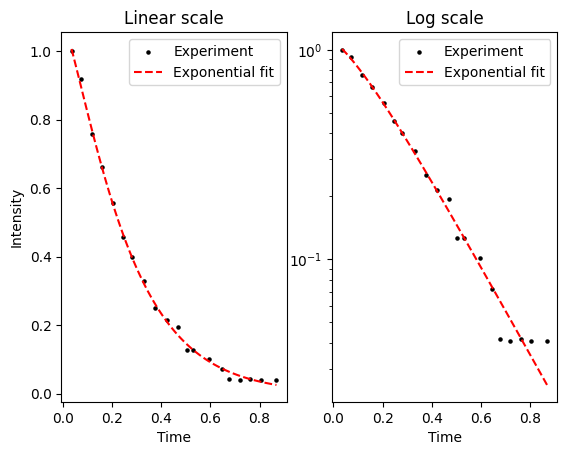

In [7]:
def exp(x, k):
    return np.exp(k * x)
func1 = lambda x1, a, b: a*np.exp(b*x1)
func2 = lambda x1, a, b, c, d: a*np.exp(b*x1) + c*np.exp(d*x1)

# Choose an approximation function
func = func2

k_appr = curve_fit(func, x, y)[0]
#m_lin = curve_fit(lin, x, np.log(y))[0]
x_ticks = np.linspace(x.min(), x.max(), 100)

y_appr = func(x_ticks, *k_appr)

figure, axis = plt.subplots(1, 2) 

axis[0].scatter(x, y, c="k", s=5, label="Experiment")
axis[0].plot(x_ticks, y_appr, "r--", label="Exponential fit") 
axis[0].set_title("Linear scale") 
axis[0].legend()
axis[0].set(xlabel='Time', ylabel='Intensity')
  
axis[1].scatter(x, y, c="k", s=5, label="Experiment")
axis[1].plot(x_ticks, y_appr, "r--", label="Exponential fit") 
axis[1].set_title("Log scale") 
axis[1].set_yscale('log')
axis[1].legend()
axis[1].set(xlabel='Time')

plt.show() 

The curve_fit function returns a tuple where the first element is the approximation coefficients that achieve the minimum error, and the second contains information about the error:


```python
curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
```
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

poptarray:

    Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.

pcov2-D array

    The estimated approximate covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters, use perr = np.sqrt(np.diag(pcov)).

Therefore, the coefficients can be output as a list, where the coefficients are arranged in the order in which they are specified in the function, excluding the first argument:

In [8]:
k_exp, pcov = curve_fit(func, x, y)

print(func.__code__.co_varnames)

for i in k_exp:
    print(i)

('x1', 'a', 'b', 'c', 'd')
-0.6193658936402566
-9.6636590454348
1.7162749549415135
-4.852045425312105


The accuracy of each parameter can be determined by the parameter pcov, which is a square matrix, by calculating the sum of the squares of the elements of the main diagonal:

In [9]:
print(pcov)

perr = np.sqrt(np.diag(pcov))
print(perr)

[[ 0.39606062 -2.87703552 -0.41075255  0.35131303]
 [-2.87703552 21.89745507  3.0082942  -2.51275231]
 [-0.41075255  3.0082942   0.42678108 -0.36392413]
 [ 0.35131303 -2.51275231 -0.36392413  0.3158956 ]]
[0.62933347 4.67947167 0.65328484 0.56204591]


Much more often, it is necessary to evaluate the accuracy of the entire approximation.

For this, you can use the r2_score function
```python
sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
```

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.r2_score.html

In [10]:
err = r2_score(y, func(x, *k_exp))
print(err)

0.9984673942495208


Sometimes the approximation fails if the default initial values of the coefficients are incorrect.  
Then you can set them manually by specifying the expected parameters:
```python
guess = np.array([0.3, -1/0.5, 0.3, -1/10])
popt, pcov = curve_fit(func,  x, y, p0=guess)
```

### Problem

1. Compare the accuracy of approximation by different functions. Is it possible to organize this as a loop without going through them manually?
2. Find the time constant in the output data if the time constant in the formulas appears as $exp(-t/\tau)$, and the approximating formulas look like $exp(kx)$
3. How would you rewrite the approximating functions (including variable names), knowing the generally accepted notation format in advance?


## Interpolation

Interpolation (from Latin "inter", i.e. "between") is a method of constructing (finding) new data points based on the range of a discrete set of known data points.   
It allows us to estimate the value for an intermediate value of the independent variable.

The interpolation goes through the experimental data points (compare with aproximation).

Used for:
* Changing the sampling step
* Obtaining intermediate values
* Connecting points for clarity

Main types:

* nearest neighbor method
* piecewise linear
* polynomial interpolation
* spline interpolation


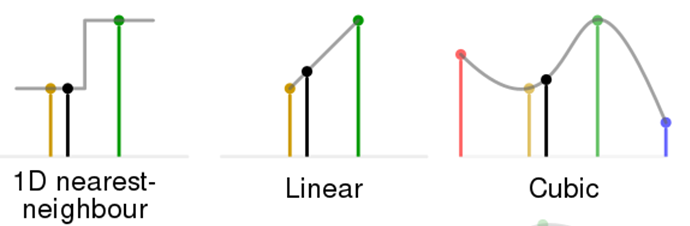

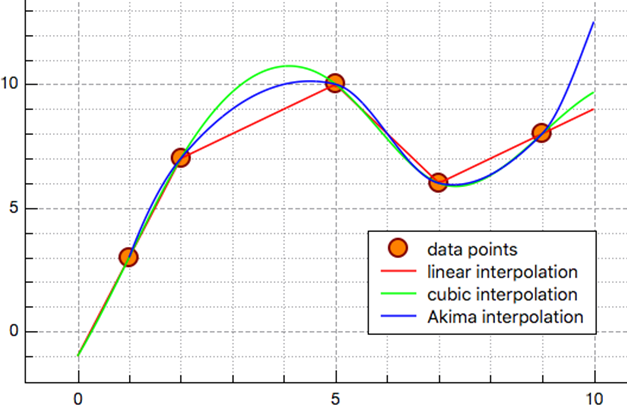

https://www.linkedin.com/pulse/more-than-linear-interpolation-python-alvaro-carnielo-e-silva 

## NumPy interpolation

https://numpy.org/doc/stable/reference/generated/numpy.interp.html 

https://www.programiz.com/python-programming/numpy/interpolation 


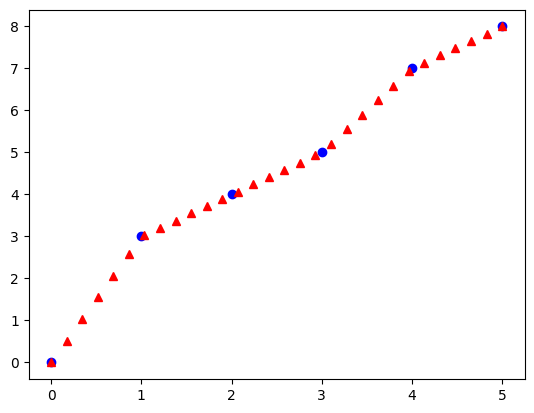

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.array([0, 1, 2, 3, 4, 5]) 
y = np.array([0, 3, 4, 5, 7, 8]) 

x_interp = np.linspace(x.min(), x.max(), 30) 
y_interp = np.interp(x_interp, x, y) 

plt.plot(x, y, 'bo') 
plt.plot(x_interp, y_interp, 'r^') 
plt.show() 

### Problem


Take the spectra and calibration curves provided by the lecturer. Recalculate the calibration curve to the spectral step (or vice versa) and perform calibration by dividing the spectral data by the calibration data.

PS The calibration curve shows the sensitivity of the detector at different wavelengths, and dividing by it allows you to correct data for different detector sensitivities. For example, such curves showing the spectral sensitivity of a photodetector can be found here https://www.thorlabs.de/newgrouppage9.cfm?objectgroup_id=3341&pn=PM100D

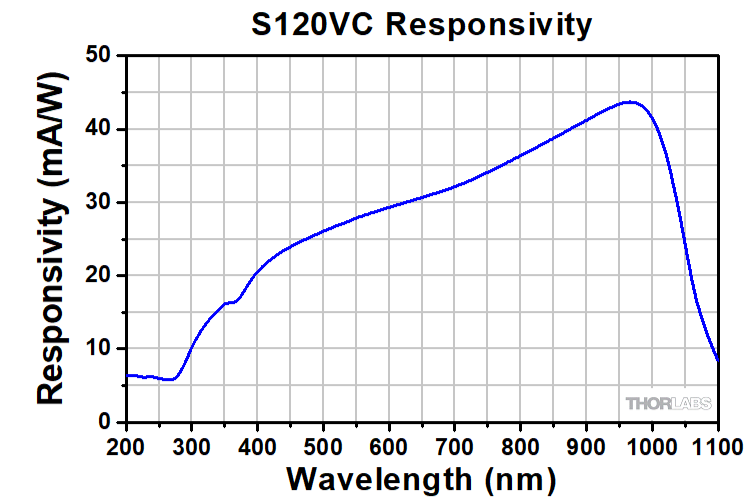